# 🌾 Crop Classification: Best Predictive Feature Using Logistic Regression

In this project, we analyze a dataset of soil features and crop types to determine which **single feature** most effectively predicts the crop type using **Logistic Regression**.

We will:
- Explore and preprocess the dataset
- Encode the categorical target variable (`crop`)
- Evaluate individual features using Logistic Regression
- Identify the feature with the highest predictive power


## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Load and Explore the Dataset
Let's load the dataset and check its structure.


In [28]:
df = pd.read_csv("crop_recommendation.csv")  # Replace with your actual file name
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Understanding the Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [30]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [31]:
df.shape

(2200, 8)

In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [34]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

## EDA

## Plot histograms for each numerical feature
A histogram is a graphical representation that organizes a group of data points into user-specified ranges (bins). It is important because it helps us understand the distribution, central tendency, spread, and presence of outliers in numerical data. This insight is crucial for selecting appropriate data preprocessing and modeling techniques.
<br>
Below, we plot histograms for key numerical variables in the Titanic dataset to visualize their distributions.

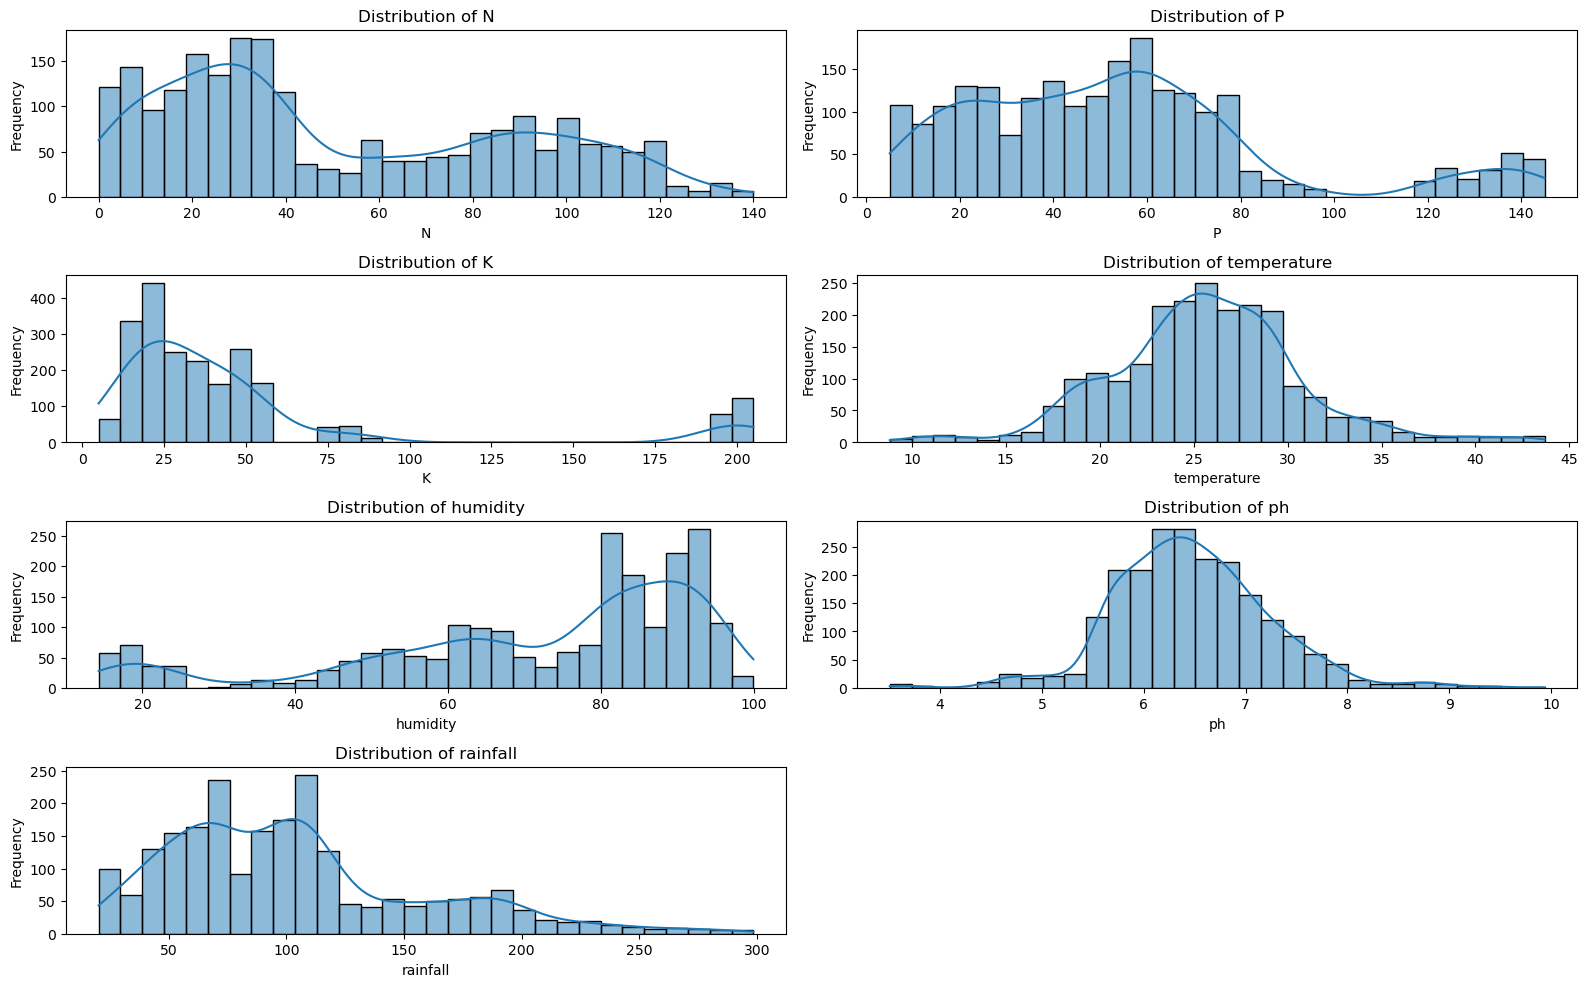

In [36]:
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

## made and citycode not included here
plt.figure(figsize=(16, 12))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns (enough for 9 plots)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Boxplots for Numerical Features
A boxplot (or box-and-whisker plot) is a standardized way of displaying the distribution of numerical data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It also highlights potential outliers.

Boxplots are useful to:

Understand the spread and skewness of the data, Identify outliers, Below, we visualize boxplots for numerical features such as Age and Fare in the Titanic dataset to gain insights into their distributions and variability.

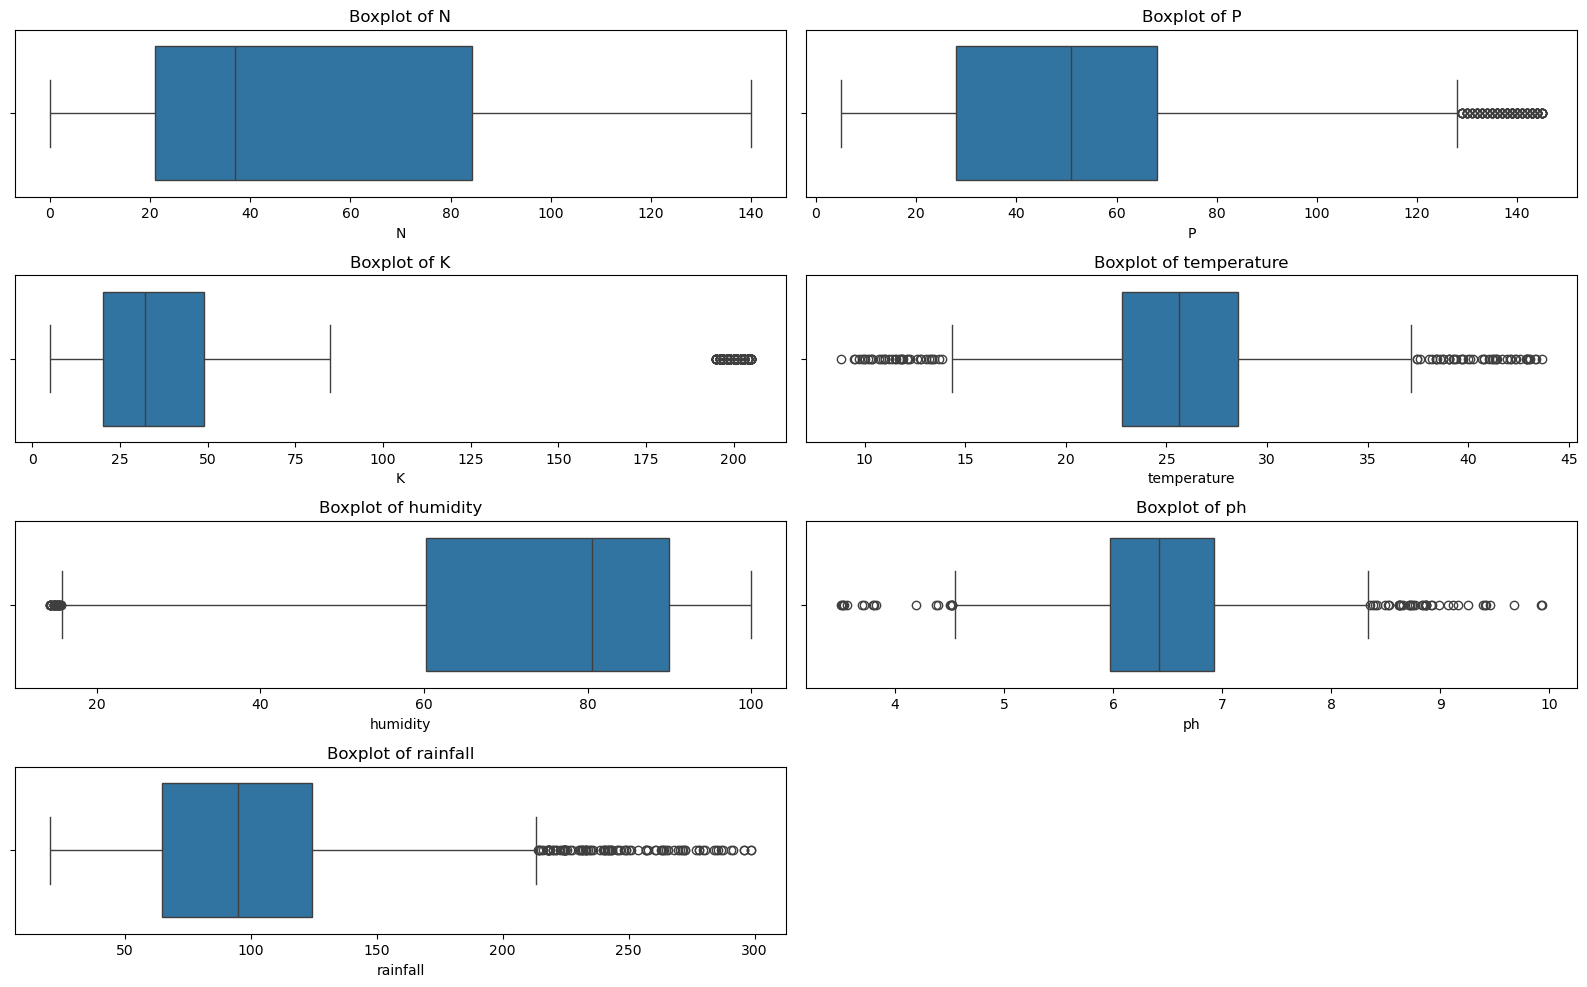

In [37]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Bivariate Analysis

## Correlation Matrix

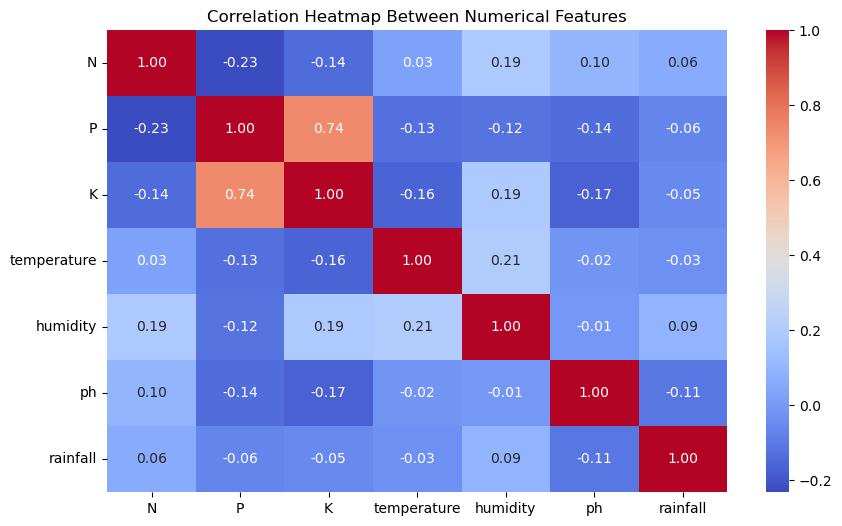

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Features")
plt.show()


## Pairplot to See Clusters 

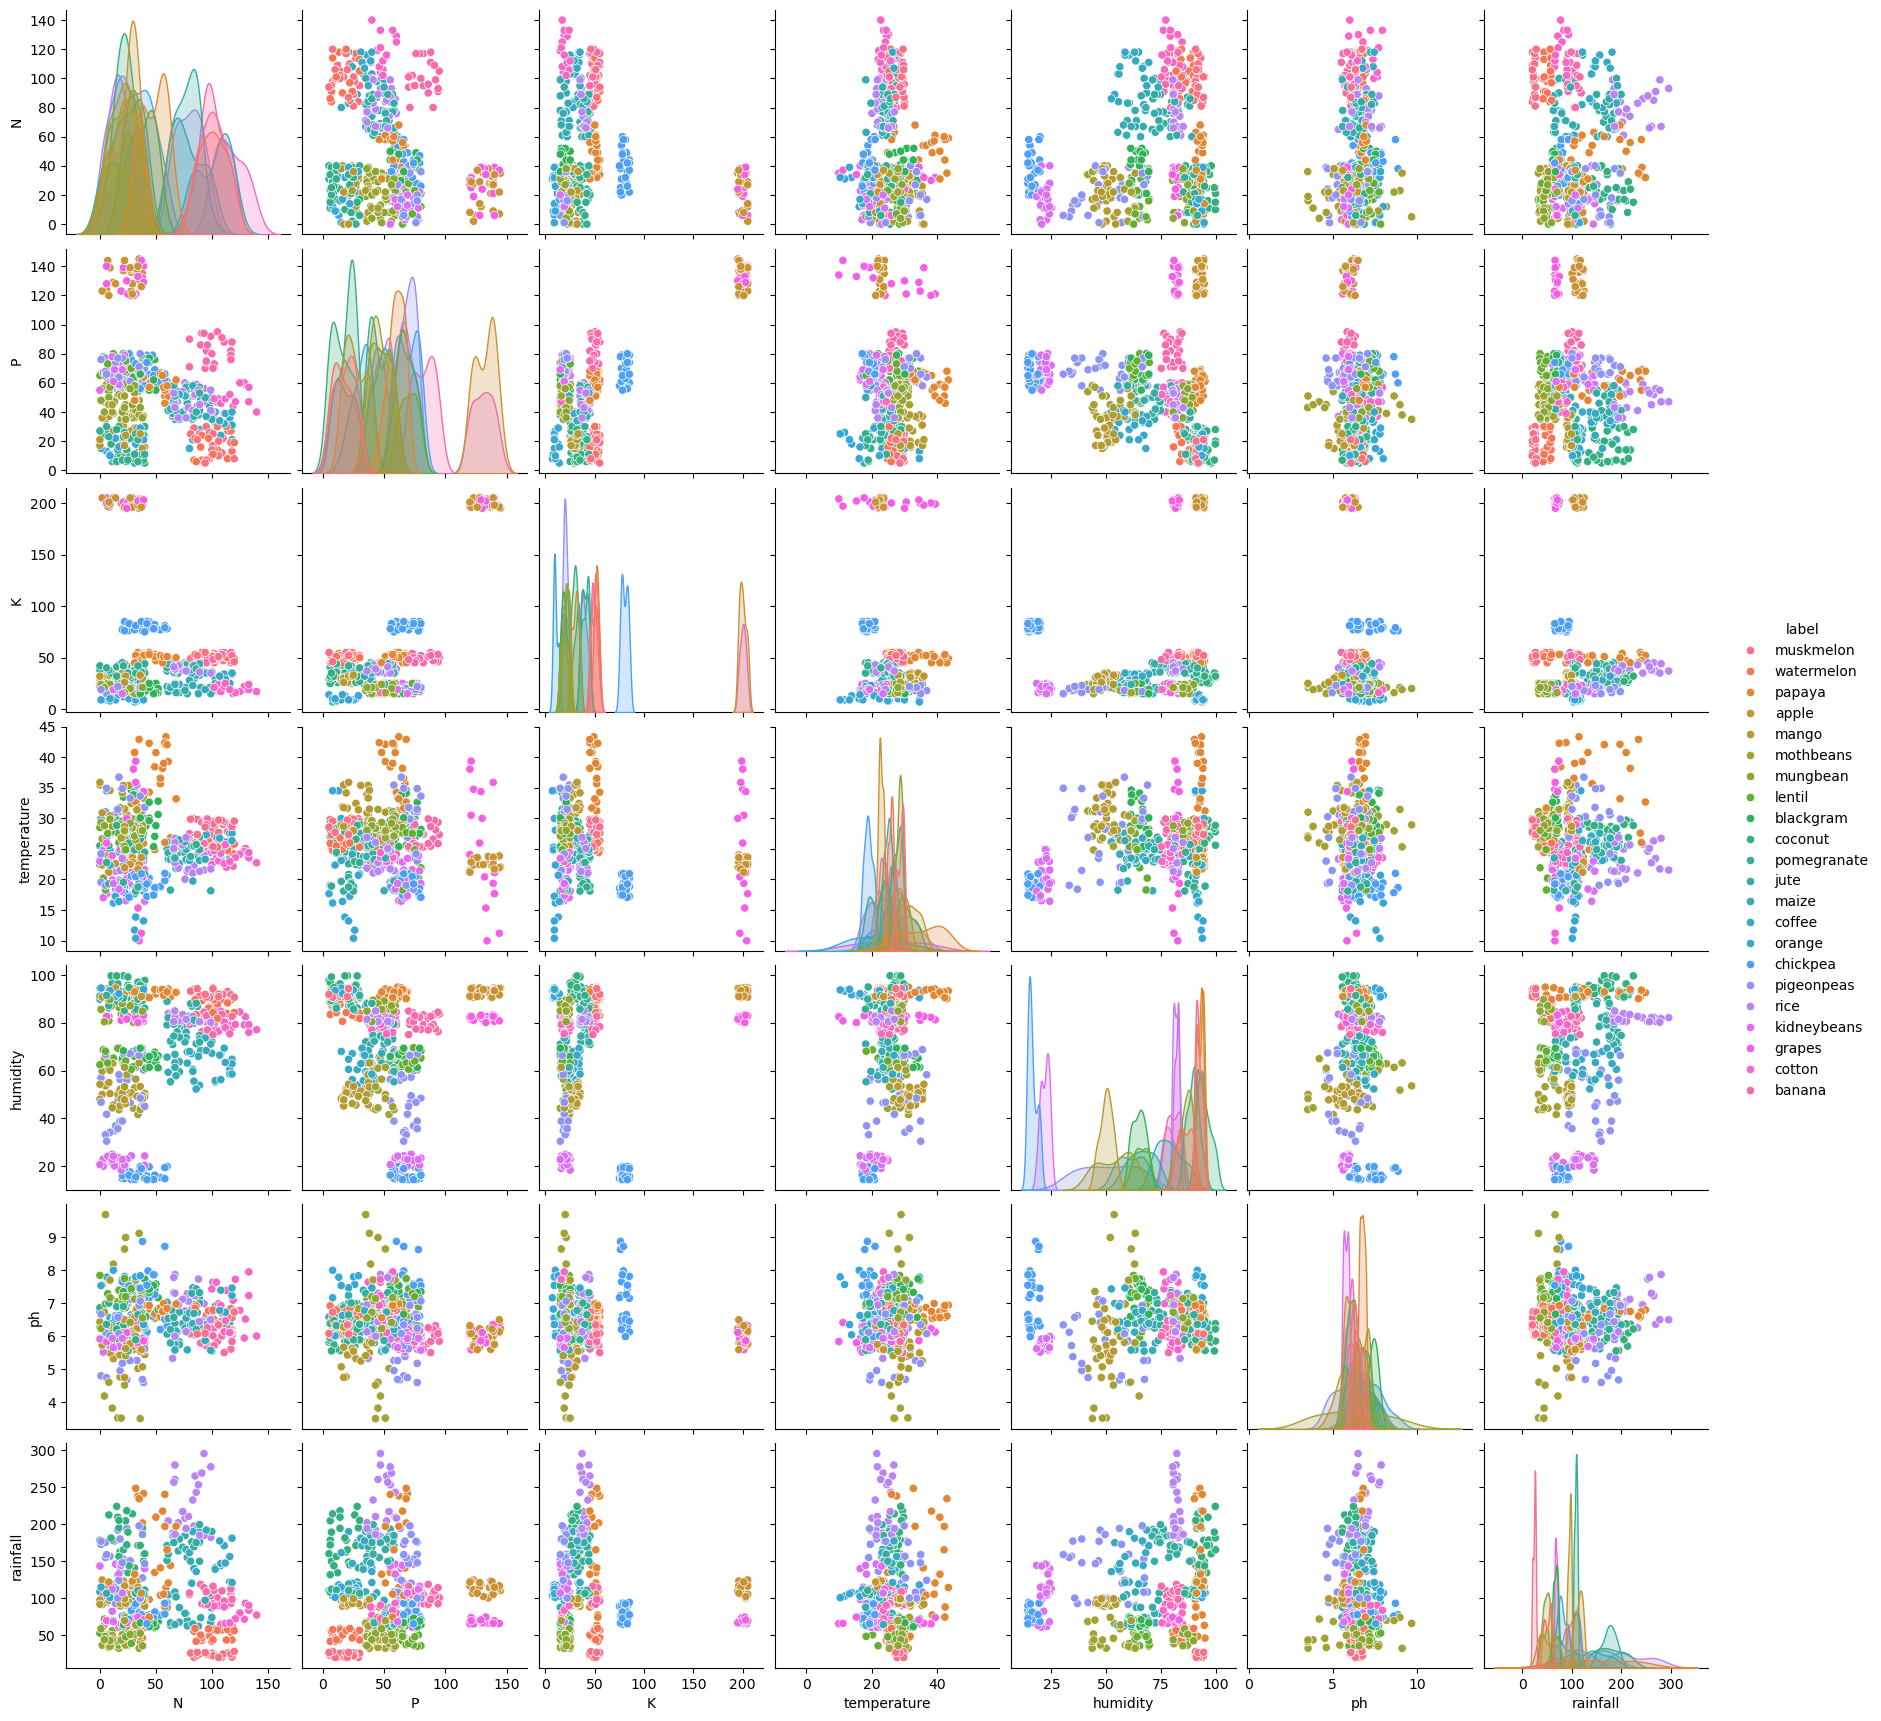

In [39]:
# Sample to speed up if necessary
sample_df = df.sample(500, random_state=42)

sns.pairplot(sample_df, hue='label', vars=feature_cols)
plt.show()

# Data splitting

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Define features and target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']

In [41]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Train & Evaluate All key classification Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [44]:
# Dictionary to store accuracy results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"🔹 {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    # print("Confusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

🔹 Logistic Regression
Accuracy: 0.9477
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.67      0.70      0.68        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       0.83      0.75      0.79        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.79      0.75      0.77        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       

In [45]:
# Sort the results dictionary by accuracy in descending order
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Print neatly
print("🔽 Model Accuracies (Sorted High to Low):\n")
for model, score in sorted_results.items():
    print(f"{model:<20} -->  Accuracy: {score:.4f}")


🔽 Model Accuracies (Sorted High to Low):

Naive Bayes          -->  Accuracy: 0.9955
Random Forest        -->  Accuracy: 0.9955
SVM                  -->  Accuracy: 0.9841
Decision Tree        -->  Accuracy: 0.9795
KNN                  -->  Accuracy: 0.9773
Logistic Regression  -->  Accuracy: 0.9477


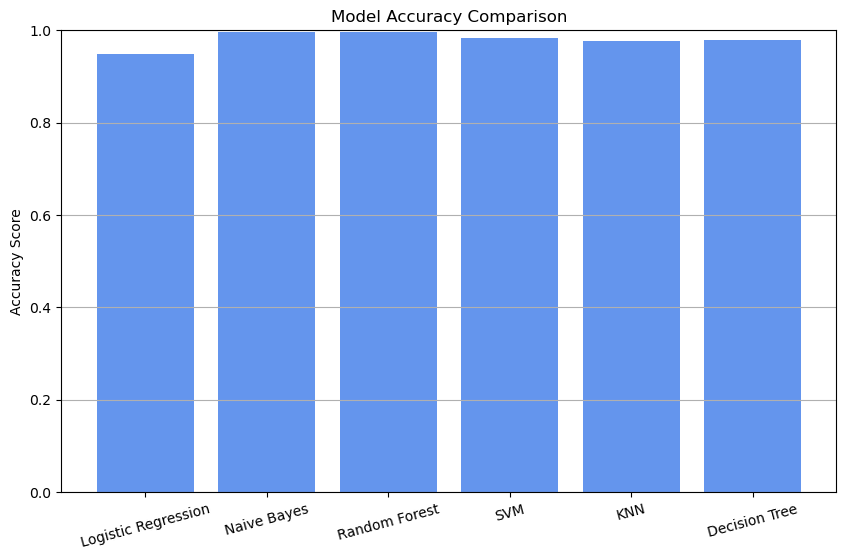

In [46]:
# Plot model accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='cornflowerblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [47]:
metrics_results = {
    "Metric": ["Accuracy", "Precision (Macro Avg)", "Recall (Macro Avg)", "F1-Score (Macro Avg)"]
}

# Re-run the loop to gather detailed metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    
    metrics_results[name] = [accuracy, precision, recall, f1]

# Convert to DataFrame
comparison_df = pd.DataFrame(metrics_results)

# Round values for better display
model_names = list(models.keys())
comparison_df[model_names] = comparison_df[model_names].round(4)

# Display
display(comparison_df)

,Metric,Logistic Regression,Naive Bayes,Random Forest,SVM,KNN,Decision Tree
0,Accuracy,0.9477,0.9955,0.9955,0.9841,0.9773,0.9795
1,Precision (Macro Avg),0.9497,0.9959,0.9957,0.9866,0.9785,0.9806
2,Recall (Macro Avg),0.9477,0.9955,0.9955,0.9841,0.9773,0.9795
3,F1-Score (Macro Avg),0.9477,0.9954,0.9955,0.9839,0.9772,0.9794


**Conclusion**:  
Random Forest outperformed SVM across all evaluation metrics and is therefore the more reliable model for this crop classification task.